current figure and save dpi = 160; current single fig size = (8, 4)


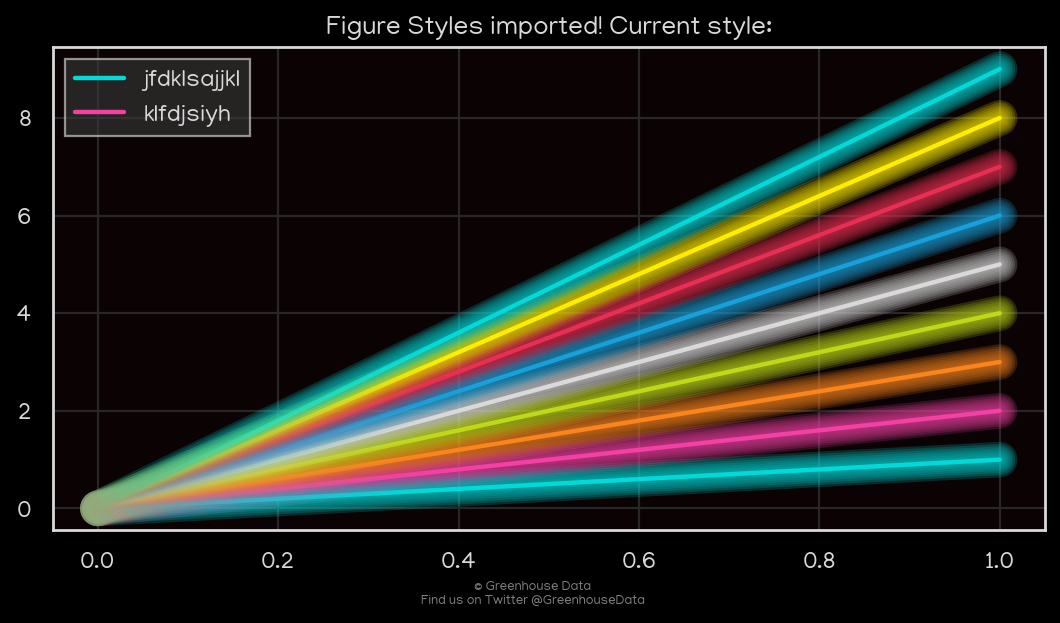

styles imported!


In [194]:
# %run Requirements.ipynb
%run Figure_Styles.ipynb

In [141]:
import random
import os
import glob
import shutil
import requests
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Random Fig

In [2]:
random_country_dir = random.choice(os.listdir("../country_data"))
random_country_dir

'MOZ_Mozambique'

In [3]:
figures = glob.glob(f"../country_data/{random_country_dir}/figures/*.png", recursive = True)
figures

['../country_data/MOZ_Mozambique/figures/MOZ_GCP_Country_Highlight.png',
 '../country_data/MOZ_Mozambique/figures/MOZ_IEA_1.png',
 '../country_data/MOZ_Mozambique/figures/MOZ_CO2_totals.png',
 '../country_data/MOZ_Mozambique/figures/MOZ_Minx_top20_subsectors.png',
 '../country_data/MOZ_Mozambique/figures/MOZ_CAIT_lucf_vs_nolucf.png',
 '../country_data/MOZ_Mozambique/figures/MOZ_CDIAC_1.png',
 '../country_data/MOZ_Mozambique/figures/MOZ_CAIT_gases_1.png',
 '../country_data/MOZ_Mozambique/figures/MOZ_UNFCCC_NAI_1.png',
 '../country_data/MOZ_Mozambique/figures/MOZ_EIA_1.png',
 '../country_data/MOZ_Mozambique/figures/MOZ_GCP_1.png']

In [4]:
random_fig = random.choice(figures)
random_fig

'../country_data/MOZ_Mozambique/figures/MOZ_GCP_Country_Highlight.png'

In [5]:
shutil.copyfile(random_fig, "../supplemental/random_daily_fig.png",)

'../supplemental/random_daily_fig.png'

In [6]:
print("random_fig path imported")

random_fig path imported


# Update NOAA Data & Graph

## Get data

### CO2

In [120]:
df_co2_raw = pd.read_csv("https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_weekly_mlo.csv", header=47)

# add datetime columns
df_co2 = df_co2_raw

df_co2["date"] = np.nan
for i,j in enumerate(df_co2.index):
    df_co2.loc[j,"date"] = str(int(df_co2.loc[j].year)) + "-" + str(int(df_co2.loc[j].month)) + "-" + str(int(df_co2.loc[j].day)) 
df_co2["date"] = pd.to_datetime(df_co2["date"]) #, format = "%Y-%m-%d", yearfirst=True

#drop
df_co2 = df_co2[df_co2.average > -998]

df_co2

,year,month,day,decimal,average,ndays,1 year ago,10 years ago,increase since 1800,date
0,1974,5,19,1974.3795,333.37,5,-999.99,-999.99,50.40,1974-05-19
1,1974,5,26,1974.3986,332.95,6,-999.99,-999.99,50.06,1974-05-26
2,1974,6,2,1974.4178,332.35,5,-999.99,-999.99,49.60,1974-06-02
3,1974,6,9,1974.4370,332.20,7,-999.99,-999.99,49.65,1974-06-09
4,1974,6,16,1974.4562,332.37,7,-999.99,-999.99,50.06,1974-06-16
...,...,...,...,...,...,...,...,...,...,...
2497,2022,3,27,2022.2342,420.37,7,417.41,395.30,138.47,2022-03-27
2498,2022,4,3,2022.2534,420.19,6,419.62,395.58,137.98,2022-04-03
2499,2022,4,10,2022.2726,420.16,6,419.00,396.76,137.60,2022-04-10
2500,2022,4,17,2022.2918,420.35,7,418.15,396.38,137.46,2022-04-17


### CH4

In [125]:
url = "https://gml.noaa.gov/webdata/ccgg/trends/ch4/ch4_mm_gl.txt"
df_ch4_raw = pd.read_csv(url, delim_whitespace=True, header = 62)

#fix columns
wrong_columns = df_ch4_raw.columns
df_ch4_raw = df_ch4_raw.drop("trend_unc", axis=1)
df_ch4_raw = df_ch4_raw.rename(dict(zip(df_ch4_raw.columns, wrong_columns[1:])), axis=1)

# add datetime columns
df_ch4["date"] = np.nan
for i,j in enumerate(df_ch4.index):
    df_ch4.loc[j,"date"] = str(int(df_ch4.loc[j].year)) + "-" + str(int(df_ch4.loc[j].month)) 
df_ch4["date"] = pd.to_datetime(df_ch4["date"]) #, format = "%Y-%m-%d", yearfirst=True

#drop
df_ch4 = df_ch4[df_ch4.average > -998]


df_ch4

,year,month,decimal,average,average_unc,trend,trend_unc,date
0,1983,7,1983.542,1625.9,2.3,1635.1,1.5,1983-07-01
1,1983,8,1983.625,1628.1,2.9,1635.6,1.4,1983-08-01
2,1983,9,1983.708,1638.4,2.3,1636.1,1.3,1983-09-01
3,1983,10,1983.792,1644.8,1.4,1636.7,1.2,1983-10-01
4,1983,11,1983.875,1642.6,0.8,1637.4,1.2,1983-11-01
...,...,...,...,...,...,...,...,...
458,2021,9,2021.708,1902.6,-9.9,1900.0,-9.9,2021-09-01
459,2021,10,2021.792,1908.0,-9.9,1901.3,-9.9,2021-10-01
460,2021,11,2021.875,1910.2,-9.9,1902.6,-9.9,2021-11-01
461,2021,12,2021.958,1910.6,-9.9,1903.7,-9.9,2021-12-01


### N2O

In [126]:
url = "https://gml.noaa.gov/webdata/ccgg/trends/n2o/n2o_mm_gl.txt"

df_n2o_raw = pd.read_csv(url, delim_whitespace=True, header = 62)

#fix columns
wrong_columns = df_n2o_raw.columns
df_n2o_raw = df_n2o_raw.drop("trend_unc", axis=1)
df_n2o_raw = df_n2o_raw.rename(dict(zip(df_n2o_raw.columns, wrong_columns[1:])), axis=1)


# add datetime columns
df_n2o["date"] = np.nan
for i,j in enumerate(df_n2o.index):
    df_n2o.loc[j,"date"] = str(int(df_n2o.loc[j].year)) + "-" + str(int(df_n2o.loc[j].month)) 
df_n2o["date"] = pd.to_datetime(df_n2o["date"]) #, format = "%Y-%m-%d", yearfirst=True

#drop
df_n2o = df_n2o[df_n2o.average > -998]


df_n2o

,year,month,decimal,average,average_unc,trend,trend_unc,date
0,2001,1,2001.042,316.3,0.2,316.0,0.1,2001-01-01
1,2001,2,2001.125,316.3,0.2,316.1,0.1,2001-02-01
2,2001,3,2001.208,316.2,0.2,316.2,0.1,2001-03-01
3,2001,4,2001.292,316.1,0.1,316.2,0.1,2001-04-01
4,2001,5,2001.375,316.1,0.1,316.3,0.1,2001-05-01
...,...,...,...,...,...,...,...,...
248,2021,9,2021.708,334.4,-9.9,334.6,-9.9,2021-09-01
249,2021,10,2021.792,334.6,-9.9,334.7,-9.9,2021-10-01
250,2021,11,2021.875,334.9,-9.9,334.8,-9.9,2021-11-01
251,2021,12,2021.958,335.1,-9.9,334.9,-9.9,2021-12-01


## Graph

In [165]:
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle

['#04D9D9',
 '#F241A3',
 '#FA851E',
 '#BFD91A',
 '#D9D9D9',
 '#1AA0D9',
 '#E62F53',
 '#FEED00']

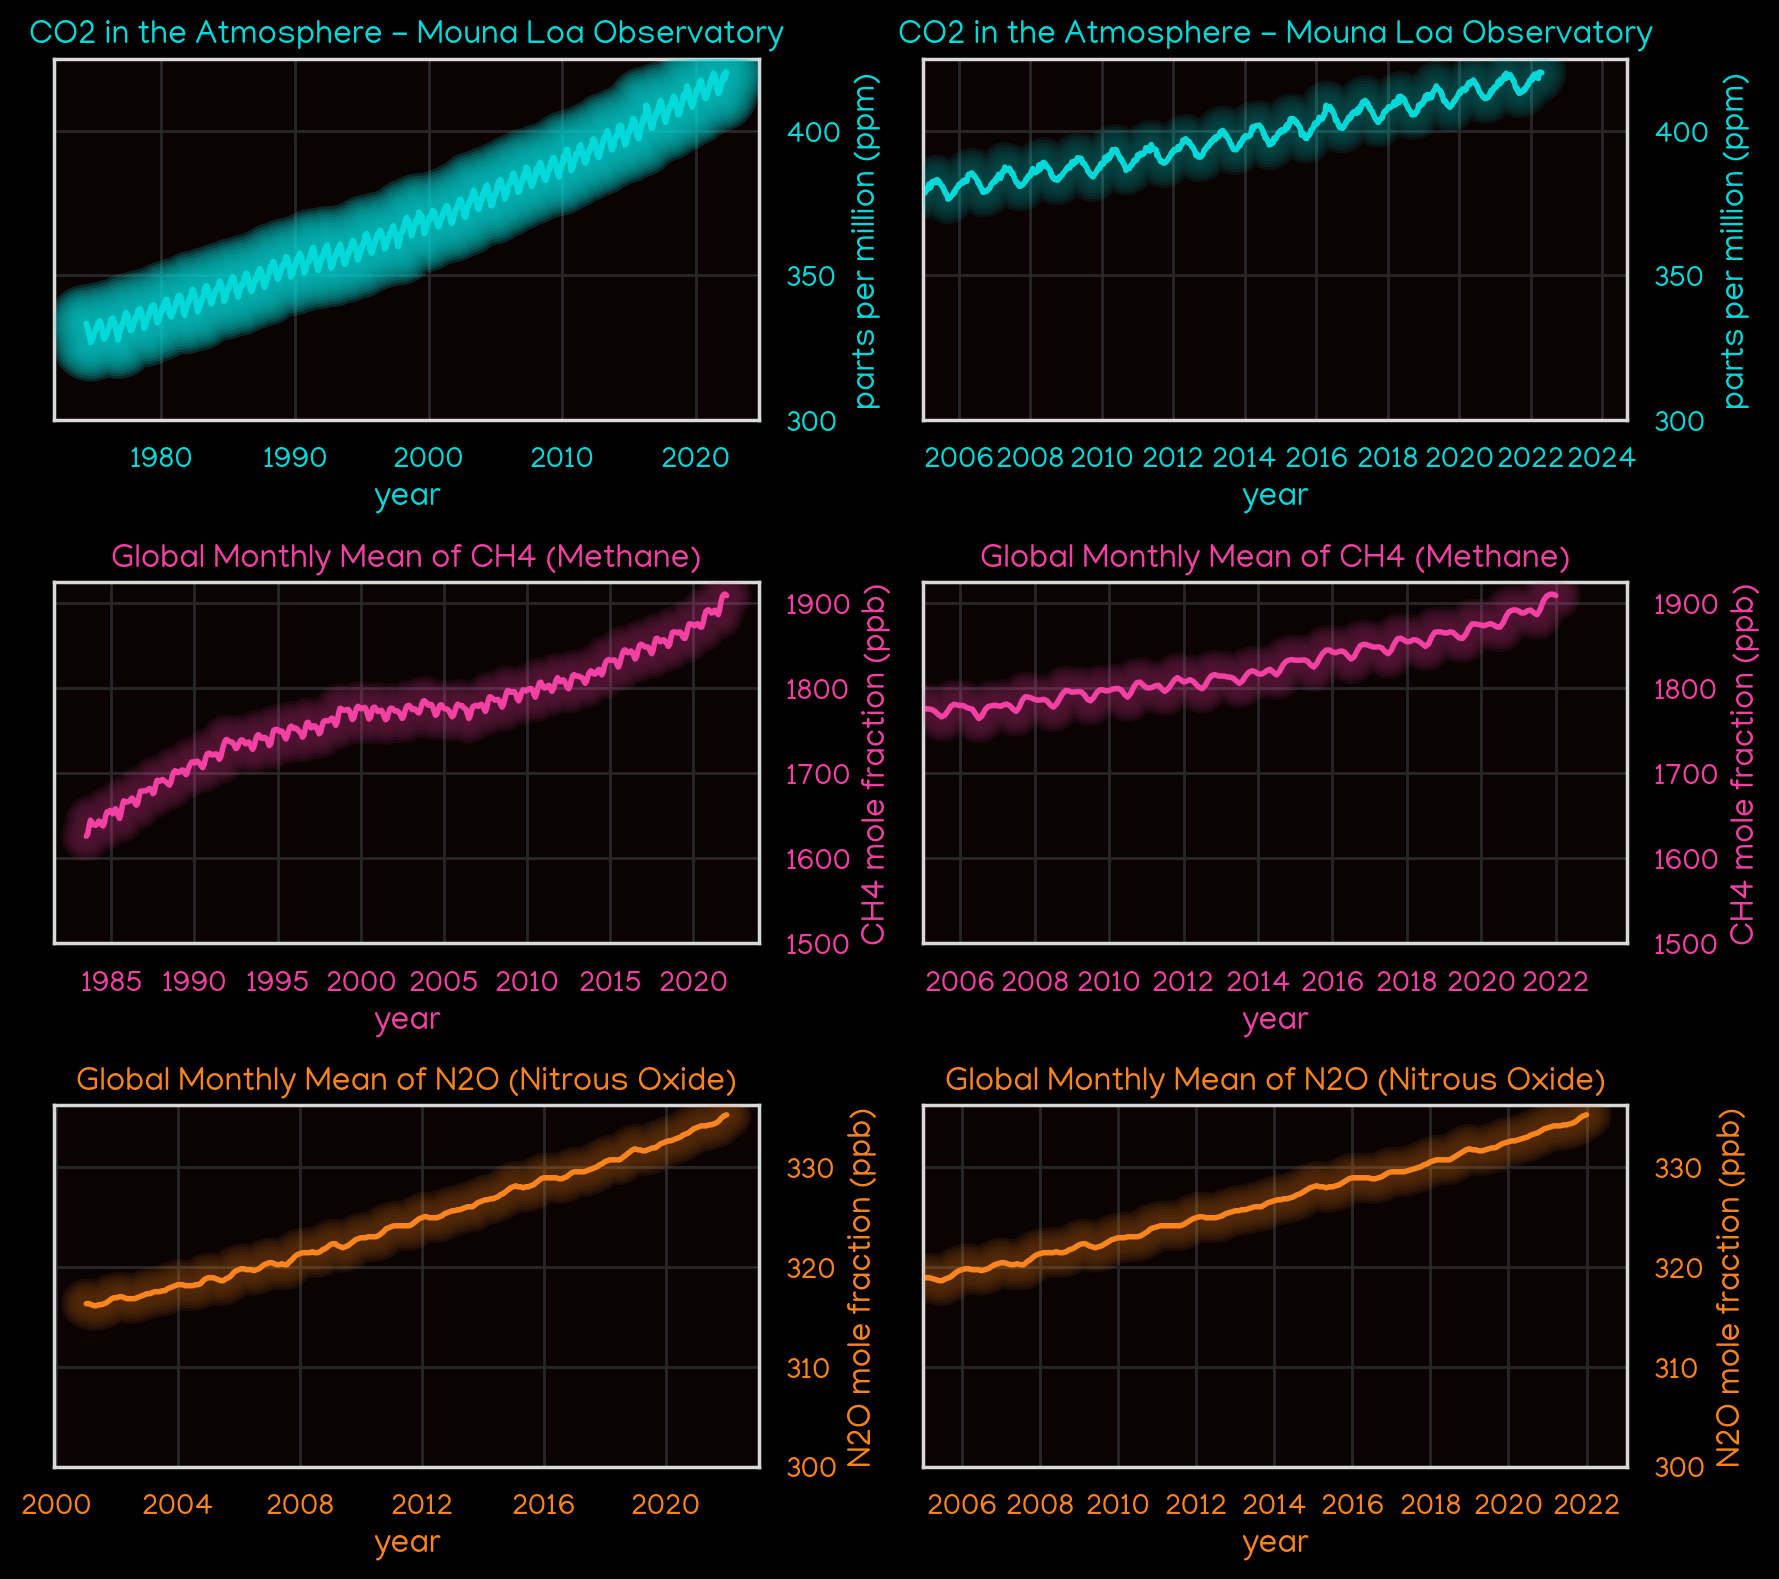

In [193]:
fig, axs = plt.subplots(3,2, figsize=(9,8), dpi=200)
axs = axs.flatten()

# CO2 - left
ax_co2 = axs[0]
ax_co2.set_title("CO2 in the Atmosphere - Mouna Loa Observatory", color= color_cycle[0])
ax_co2.plot(df_co2.date, df_co2.average, color= color_cycle[0])

ax_co2.set_xlabel("year", color= color_cycle[0])
ax_co2.set_ylim(bottom=300)
ax_co2.set_ylabel("parts per million (ppm)", color = color_cycle[0])
ax_co2.tick_params(labelleft = False, labelright=True, labelcolor = color_cycle[0])
ax_co2.yaxis.set_label_position("right")

# CO2 ZOOM
ax_co2_zoom = axs[1]
ax_co2_zoom.set_title("CO2 in the Atmosphere - Mouna Loa Observatory", color= color_cycle[0])
ax_co2_zoom.plot(df_co2.date, df_co2.average, color= color_cycle[0])

ax_co2_zoom.set_xlabel("year", color= color_cycle[0])
ax_co2_zoom.set_xlim(left=datetime(2005,1,1))
ax_co2_zoom.set_ylim(bottom=300)
ax_co2_zoom.set_ylabel("parts per million (ppm)", color = color_cycle[0])
ax_co2_zoom.tick_params(labelleft = False, labelright=True, labelcolor = color_cycle[0])
ax_co2_zoom.yaxis.set_label_position("right")





# CH4 - LEFT
ax_ch4 = axs[2]
ax_ch4.set_title("Global Monthly Mean of CH4 (Methane)", color= color_cycle[1])
ax_ch4.plot(df_ch4.date, df_ch4.average, color= color_cycle[1])

ax_ch4.set_xlabel("year", color= color_cycle[1])
ax_ch4.set_ylim(bottom=1500)
ax_ch4.set_ylabel("CH4 mole fraction (ppb)", color = color_cycle[1])
ax_ch4.tick_params(labelleft = False, labelright=True, labelcolor = color_cycle[1])
ax_ch4.yaxis.set_label_position("right")


# CH4 ZOOM
ax_ch4_zoom = axs[3]
ax_ch4_zoom.set_title("Global Monthly Mean of CH4 (Methane)", color= color_cycle[1])
ax_ch4_zoom.plot(df_ch4.date, df_ch4.average, color= color_cycle[1])

ax_ch4_zoom.set_xlabel("year", color= color_cycle[1])
ax_ch4_zoom.set_xlim(left=datetime(2005,1,1))
ax_ch4_zoom.set_ylim(bottom=1500)
ax_ch4_zoom.set_ylabel("CH4 mole fraction (ppb)", color = color_cycle[1])
ax_ch4_zoom.tick_params(labelleft = False, labelright=True, labelcolor = color_cycle[1])
ax_ch4_zoom.yaxis.set_label_position("right")





# N2O - LEFT
ax_n2o = axs[4]
ax_n2o.set_title("Global Monthly Mean of N2O (Nitrous Oxide)", color= color_cycle[2])
ax_n2o.plot(df_n2o.date, df_n2o.average, color= color_cycle[2])

ax_n2o.set_xlabel("year", color= color_cycle[2])
ax_n2o.set_ylim(bottom=300)
ax_n2o.set_ylabel("N2O mole fraction (ppb)", color = color_cycle[2])
ax_n2o.tick_params(labelleft = False, labelright=True, labelcolor = color_cycle[2])
ax_n2o.yaxis.set_label_position("right")


# N2O - LEFT
ax_n2o_zoom = axs[5]
ax_n2o_zoom.set_title("Global Monthly Mean of N2O (Nitrous Oxide)", color= color_cycle[2])
ax_n2o_zoom.plot(df_n2o.date, df_n2o.average, color = color_cycle[2])

ax_n2o_zoom.set_xlabel("year", color= color_cycle[2])
ax_n2o_zoom.set_xlim(left = datetime(2005,1,1))
ax_n2o_zoom.set_ylim(bottom=300)
ax_n2o_zoom.set_ylabel("N2O mole fraction (ppb)", color = color_cycle[2])
ax_n2o_zoom.tick_params(labelleft = False, labelright=True, labelcolor = color_cycle[2])
ax_n2o_zoom.yaxis.set_label_position("right")





NEONIZE(ax_co2, 14, 95)
NEONIZE(ax_ch4, 9)
NEONIZE(ax_co2_zoom, 9)
NEONIZE(ax_n2o, 9)
NEONIZE(ax_ch4_zoom, 9)
NEONIZE(ax_n2o_zoom, 9)

fig.tight_layout()